##  Select the best model of traditional demographic model

In [14]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import joblib

# # Read the data
# demographic_data = pd.read_csv('/Users/minu/Desktop/R24-066/Component 04/Dataset/demographic_data_dataset.csv')
# defect_data = pd.read_csv('/Users/minu/Desktop/R24-066/Component 04/Dataset/worker_defect_production_data.csv')

# # Convert Date columns to datetime
# demographic_data['Joining_Date'] = pd.to_datetime(demographic_data['Joining_Date'])
# defect_data['Date'] = pd.to_datetime(defect_data['Date'])

# # Combine datasets on Worker_ID
# combined_data = pd.merge(defect_data, demographic_data, on='Worker_ID')

# # Drop unnecessary columns
# fields_to_drop = ['Name', 'Joining_Date']
# combined_data.drop(columns=fields_to_drop, inplace=True)

# # Rename defect columns
# defect_columns_mapping = {
#     'Run_Off_D1': 'Run_Off',
#     'Open_Seam_D2': 'Open_Seam',
#     'SPI_Errors_D3': 'SPI_Errors',
#     'High_Low_D4': 'High_Low'
# }
# combined_data.rename(columns=defect_columns_mapping, inplace=True)

# # Define categorical features for one-hot encoding
# categorical_features = ['Gender', 'Skill_Level', 'Shift']
# numerical_features = ['Age', 'Production_Volume']

# # Ensure that all columns are present
# missing_columns = [col for col in categorical_features + numerical_features if col not in combined_data.columns]
# if missing_columns:
#     raise ValueError(f"The following columns are missing in the combined dataset: {missing_columns}")

# # Define preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(), categorical_features),
#         ('num', StandardScaler(), numerical_features)
#     ]
# )

# # Separate features and target variables
# X = combined_data.drop(columns=['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low', 'defect_count', 'count', 'Worker_ID', 'Date'])
# y = combined_data[['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']]

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define multiple models
# models = {
#     'RandomForest': MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)),
#     'GradientBoosting': MultiOutputRegressor(GradientBoostingRegressor(random_state=42)),
#     'LinearRegression': MultiOutputRegressor(LinearRegression()),
#     'SupportVector': MultiOutputRegressor(SVR())
# }

# # Evaluate each model using cross-validation
# results = {}
# for model_name, model in models.items():
#     pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('regressor', model)
#     ])
    
#     cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#     results[model_name] = -cv_scores.mean()  # Negate because cross_val_score uses negative MSE
#     print(f"{model_name}: Mean CV MSE = {results[model_name]}")
# print()

# # Select the best model
# best_model_name = min(results, key=results.get)
# best_model = models[best_model_name]

# print(f"Best model: {best_model_name} with Mean CV MSE = {results[best_model_name]}")
# print()

# # Train the best model on the full training data
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', best_model)
# ])
# pipeline.fit(X_train, y_train)

# # Save the trained traditional model
# model_output_path = '/Users/minu/Desktop/R24-066/Component 04/Backend/Save_model/best_traditional_model.pkl'
# joblib.dump(pipeline, model_output_path)

# # Predict on the test set
# y_pred = pipeline.predict(X_test)

# # Evaluate the model and print metrics for each defect type
# mse_values = mean_squared_error(y_test, y_pred, multioutput='raw_values')
# r2_values = r2_score(y_test, y_pred, multioutput='raw_values')
# mae_values = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
# defect_types = ['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']

# for defect_type, mse, r2, mae in zip(defect_types, mse_values, r2_values, mae_values):
#     print(f"Metrics for {defect_type}:")
#     print(f"  - Mean Squared Error: {mse}")
#     print(f"  - R² Score: {r2}")
#     print(f"  - Mean Absolute Error: {mae}")
#     print('----------------------------------------------------------------')

# # Overall evaluation metrics
# overall_mse = mean_squared_error(y_test, y_pred)
# overall_r2 = r2_score(y_test, y_pred)
# overall_mae = mean_absolute_error(y_test, y_pred)

# print(f"Overall Mean Squared Error: {overall_mse}")
# print(f"Overall R² Score: {overall_r2}")
# print(f"Overall Mean Absolute Error: {overall_mae}")

# # Function to get feature names after preprocessing
# def get_feature_names(preprocessor, numerical_features, categorical_features):
#     feature_names = numerical_features
#     ohe_categories = preprocessor.transformers_[0][1].categories_
#     cat_names = []
#     for i, cat in enumerate(categorical_features):
#         cat_names.extend([f"{cat}_{ohe_categories[i][j]}" for j in range(len(ohe_categories[i]))])
#     feature_names.extend(cat_names)
#     return feature_names

# # Get the feature names
# feature_names = get_feature_names(preprocessor, numerical_features, categorical_features)

# # Plot feature importances for each defect type (for tree-based models)
# if hasattr(best_model, 'estimators_') and hasattr(best_model.estimators_[0], 'feature_importances_'):
#     for i, defect_type in enumerate(defect_types):
#         importances = pipeline.named_steps['regressor'].estimators_[i].feature_importances_
#         indices = np.argsort(importances)[::-1]
        
#         # Plot the feature importances for each defect type
#         plt.figure(figsize=(10, 6))
#         plt.title(f"Feature Importances for {defect_type}")
#         plt.bar(range(len(importances)), importances[indices], align='center', color='lightblue')
#         plt.xticks(range(len(importances)), [feature_names[j] for j in indices], rotation=90)
#         plt.xlim([-1, len(importances)])
#         plt.xlabel('Features')
#         plt.ylabel('Importance')
#         plt.show()

# # Analyze the effect of Age and Skill Level on each defect type
# def analyze_demographics(data, demographic_feature):
#     for defect_type in defect_types:
#         subset = data[data[defect_type] > 0]  # Filter rows where the defect type count is greater than 0
        
#         fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
        
#         # Age Distribution
#         sns.histplot(subset['Age'], ax=axes[0], kde=True, color='lightblue')
#         axes[0].set_title(f'Age Distribution for {defect_type}')
#         axes[0].set_xlabel('Age')
#         axes[0].set_ylabel('Frequency')
        
#         # Skill Level Distribution
#         sns.countplot(x=subset['Skill_Level'], ax=axes[1], palette='pastel')
#         axes[1].set_title(f'Skill Level Distribution for {defect_type}')
#         axes[1].set_xlabel('Skill Level')
#         axes[1].set_ylabel('Count')
        
#         plt.tight_layout()
#         plt.show()

# # # Analyze the effect of Age and Skill Level on each defect type
# # analyze_demographics(combined_data, 'Age')
# # analyze_demographics(combined_data, 'Skill_Level')

# # Analyze the effect of Age and Skill Level on each defect type
# analyze_demographics(combined_data, defect_types)

# # Calculate total defects if not already present
# if 'total_defects' not in combined_data.columns:
#     combined_data['total_defects'] = combined_data[defect_types].sum(axis=1)

# # Creating a pivot table with Skill Level as index and defect type as columns
# pivot_table = combined_data.pivot_table(index='Skill_Level', columns='total_defects', values='Production_Volume', aggfunc='sum', fill_value=0)

# # Heatmap of defect counts across skill levels and defect types
# pivot_table = combined_data.pivot_table(index='Skill_Level', columns='Run_Off', values='Production_Volume', aggfunc='sum')
# plt.figure(figsize=(10, 8))
# sns.heatmap(pivot_table, annot=True, cmap='Pastel1')
# plt.title('Heatmap of Defect Counts across Skill Levels and Defect Types')
# plt.show()

# # Bar plot for mean defect counts by Skill Level
# plt.figure(figsize=(10, 6))
# sns.barplot(data=combined_data, x='Skill_Level', y='Production_Volume', ci=None, palette='pastel')
# plt.title('Mean Defect Counts by Skill Level')
# plt.xlabel('Skill Level')
# plt.ylabel('Mean Defect Count')
# plt.show()

# # Bar plot for mean defect counts by Gender
# plt.figure(figsize=(10, 6))
# sns.barplot(data=combined_data, x='Gender', y='Production_Volume', ci=None, palette='pastel')
# plt.title('Mean Defect Counts by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Mean Defect Count')
# plt.show()

# # Box plot for Age distribution by defect type
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=combined_data, x='Run_Off', y='Age', palette='pastel')
# plt.title('Age Distribution by Defect Type')
# plt.xlabel('Defect Type')
# plt.ylabel('Age')
# plt.show()

# # Box plot for Production Volume distribution by defect type
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=combined_data, x='Run_Off', y='Production_Volume', palette='pastel')
# plt.title('Production Volume Distribution by Defect Type')
# plt.xlabel('Defect Type')
# plt.ylabel('Production Volume')
# plt.show()


/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/801270255.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  demographic_data['Joining_Date'] = pd.to_datetime(demographic_data['Joining_Date'])


Model: RandomForest
  Best Score (MSE): 4.11106174832035
  Best Parameters: {'regressor__estimator__max_depth': 6, 'regressor__estimator__min_samples_leaf': 5, 'regressor__estimator__min_samples_split': 2, 'regressor__estimator__n_estimators': 107}
----------------------------------------------------------------
Model: GradientBoosting
  Best Score (MSE): 4.223969180805452
  Best Parameters: {'regressor__estimator__learning_rate': 0.025601864044243652, 'regressor__estimator__max_depth': 5, 'regressor__estimator__min_samples_leaf': 7, 'regressor__estimator__min_samples_split': 4, 'regressor__estimator__n_estimators': 137}
----------------------------------------------------------------
Model: SupportVector
  Best Score (MSE): 4.022989988760407
  Best Parameters: {'regressor__estimator__C': 2.2233911067827616, 'regressor__estimator__epsilon': 0.028182496720710062, 'regressor__estimator__kernel': 'linear'}
----------------------------------------------------------------
Model: LinearRegre

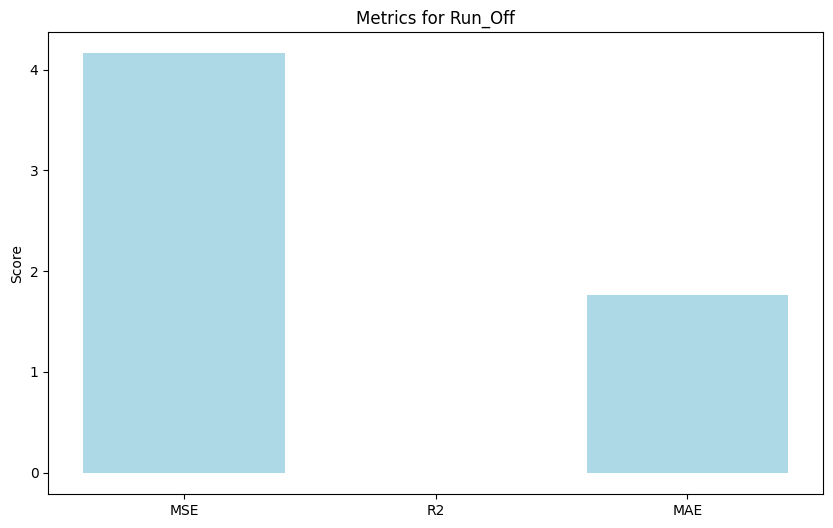

Metrics for Open_Seam:
  - Mean Squared Error: 4.07344435016392
  - R² Score: -0.0032212706756551412
  - Mean Absolute Error: 1.7138696442119552
----------------------------------------------------------------


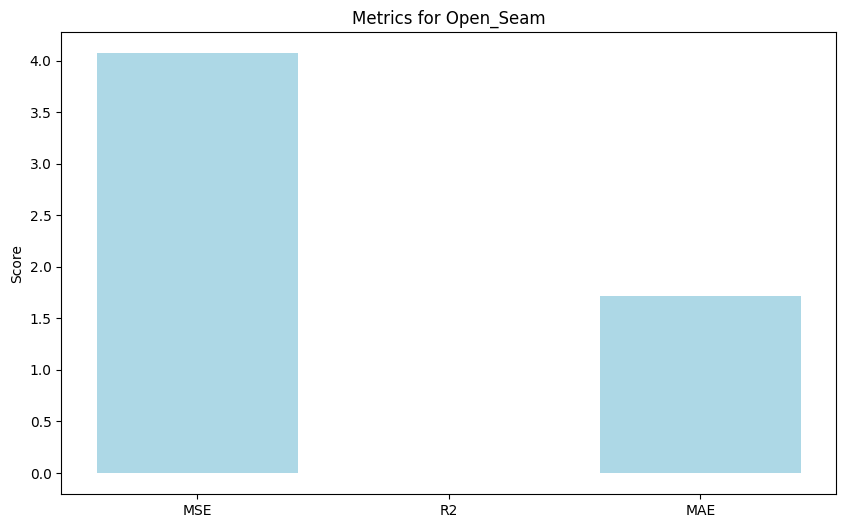

Metrics for SPI_Errors:
  - Mean Squared Error: 4.156784610533174
  - R² Score: -0.0008221251458380152
  - Mean Absolute Error: 1.7670756299165433
----------------------------------------------------------------


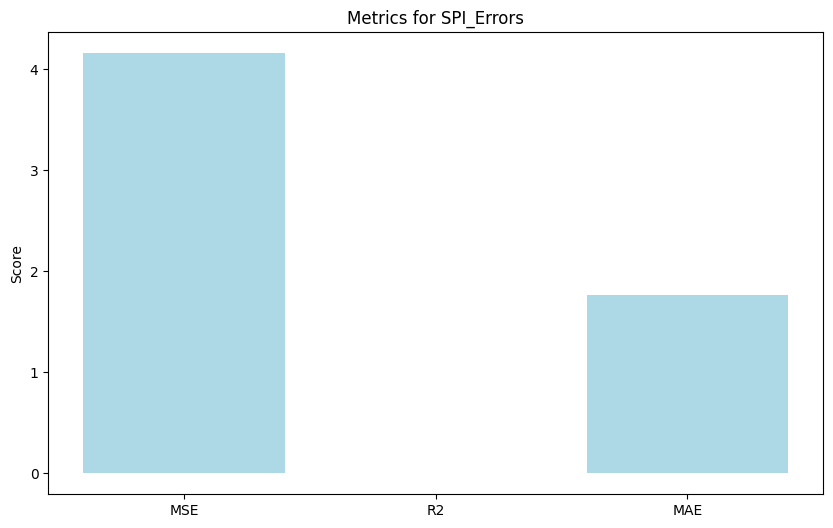

Metrics for High_Low:
  - Mean Squared Error: 4.168613821252762
  - R² Score: -0.003554809312218188
  - Mean Absolute Error: 1.7452831130455615
----------------------------------------------------------------


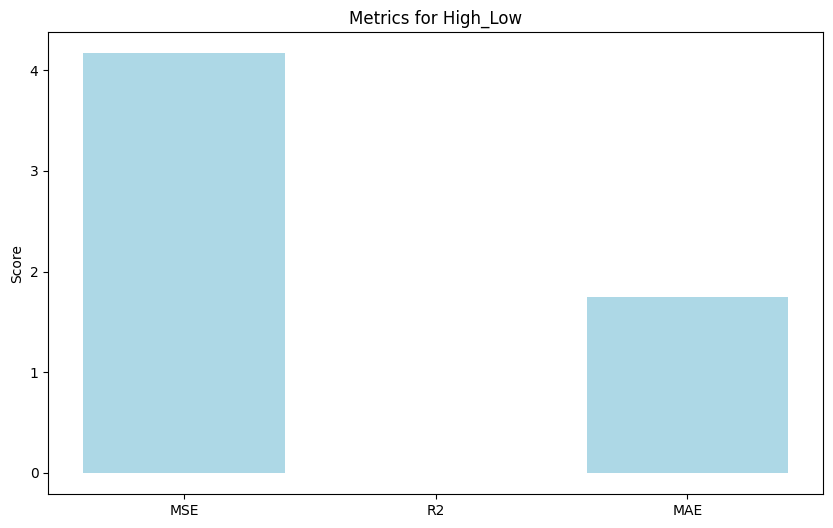

Overall Mean Squared Error: 4.140263636774179
Overall R² Score: -0.003330565616932679
Overall Mean Absolute Error: 1.7466020943976357


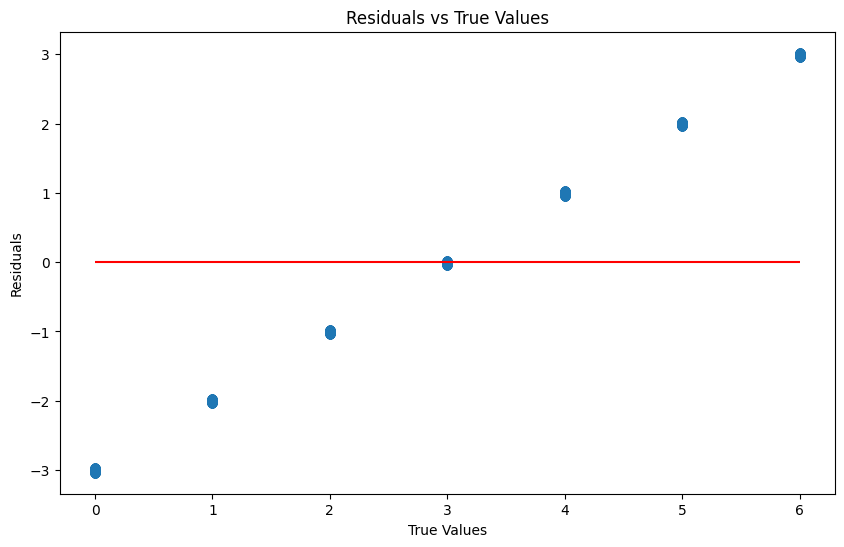

/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/801270255.py:232: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=subset['Skill_Level'], ax=axes[1], palette='pastel')


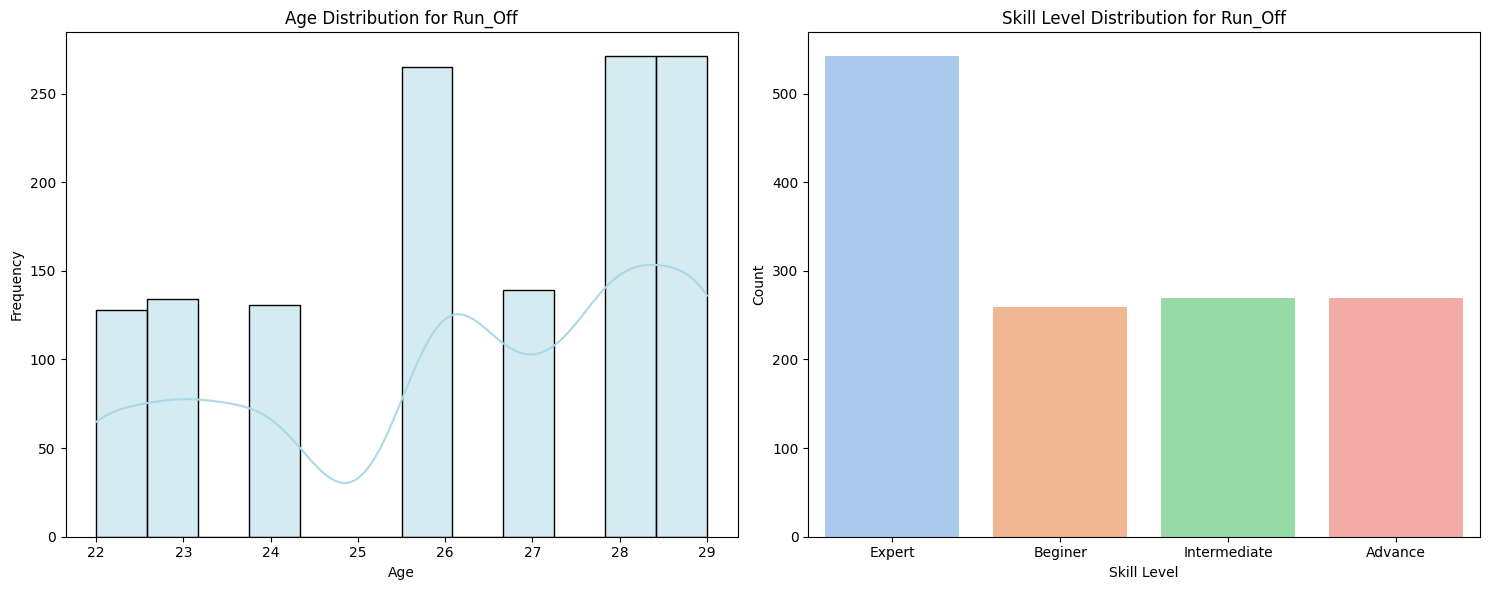

/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/801270255.py:232: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=subset['Skill_Level'], ax=axes[1], palette='pastel')


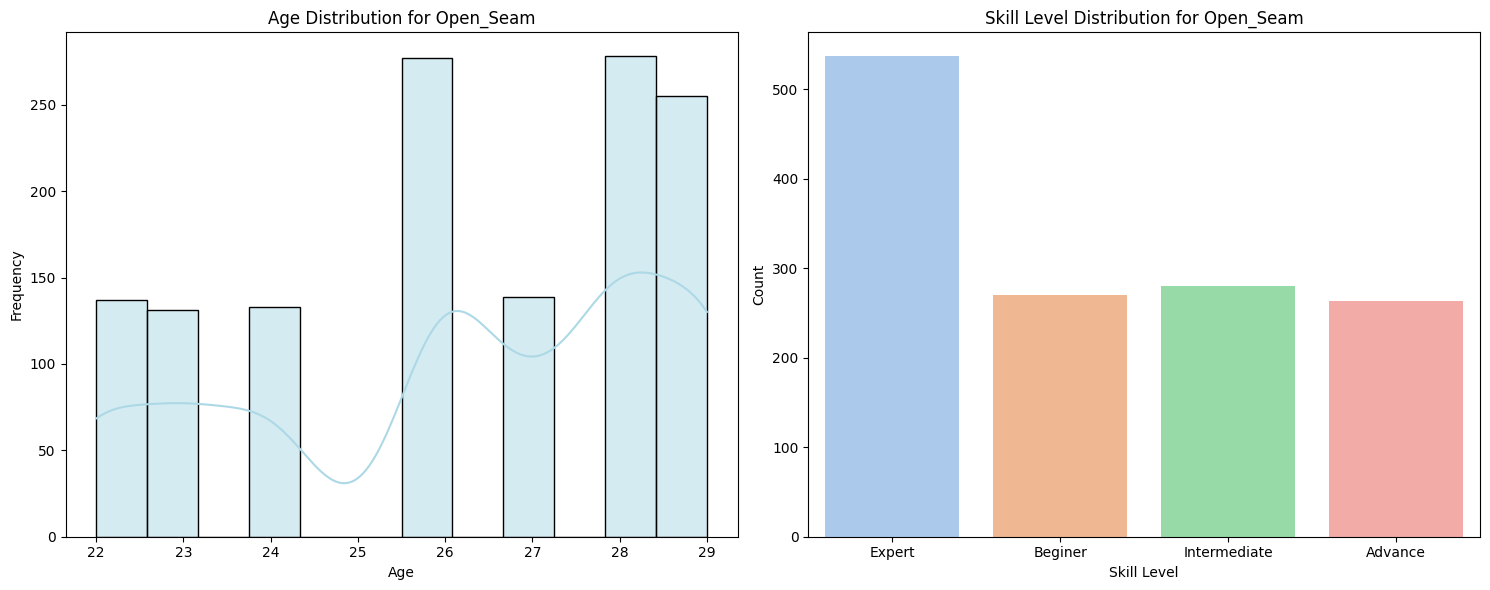

/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/801270255.py:232: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=subset['Skill_Level'], ax=axes[1], palette='pastel')


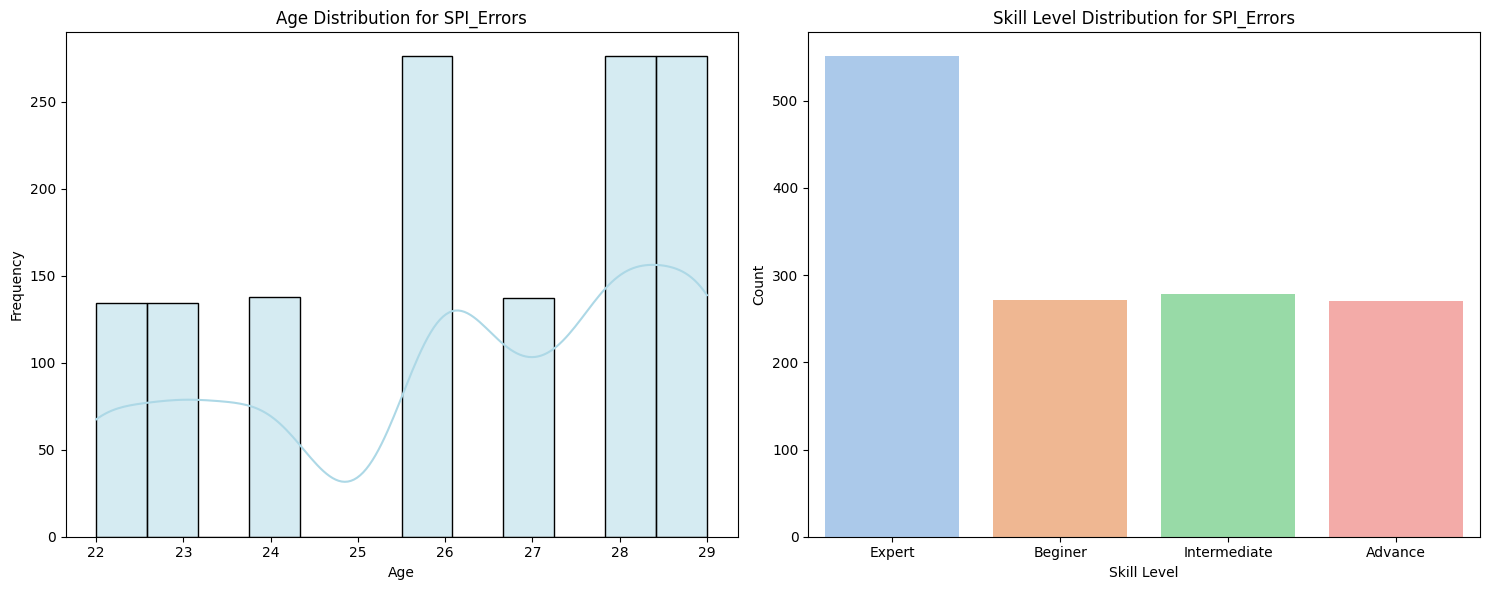

/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/801270255.py:232: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=subset['Skill_Level'], ax=axes[1], palette='pastel')


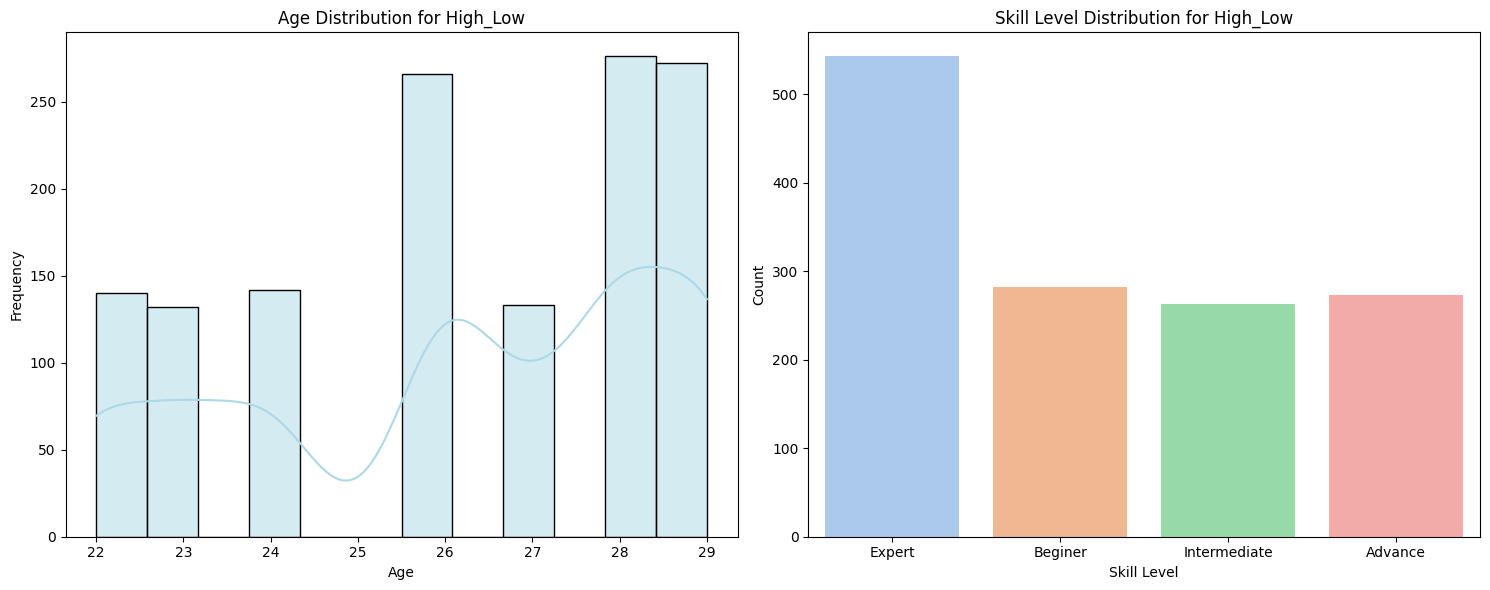

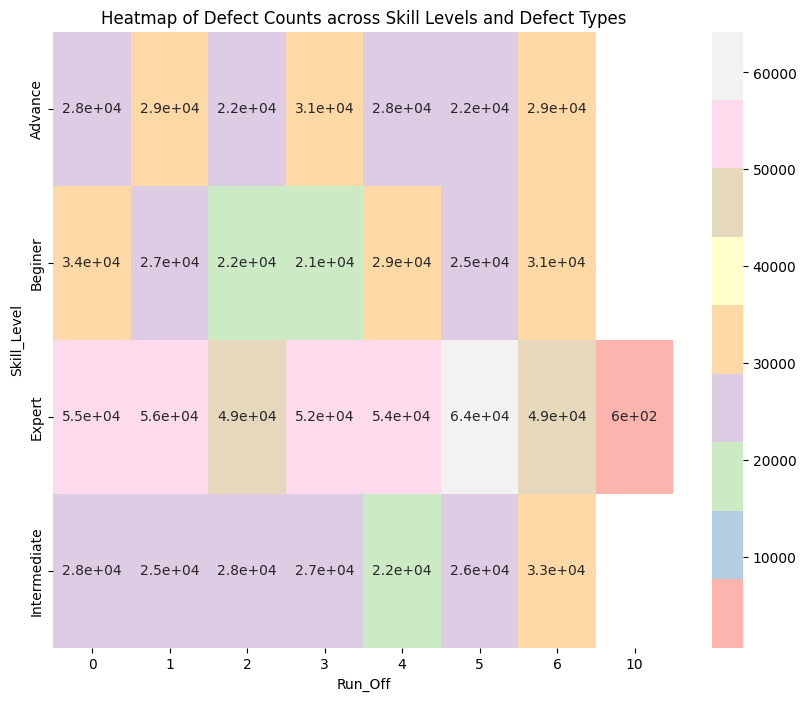

/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/801270255.py:252: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Skill_Level', y='Production_Volume', ci=None, palette='pastel')
/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/801270255.py:252: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined_data, x='Skill_Level', y='Production_Volume', ci=None, palette='pastel')


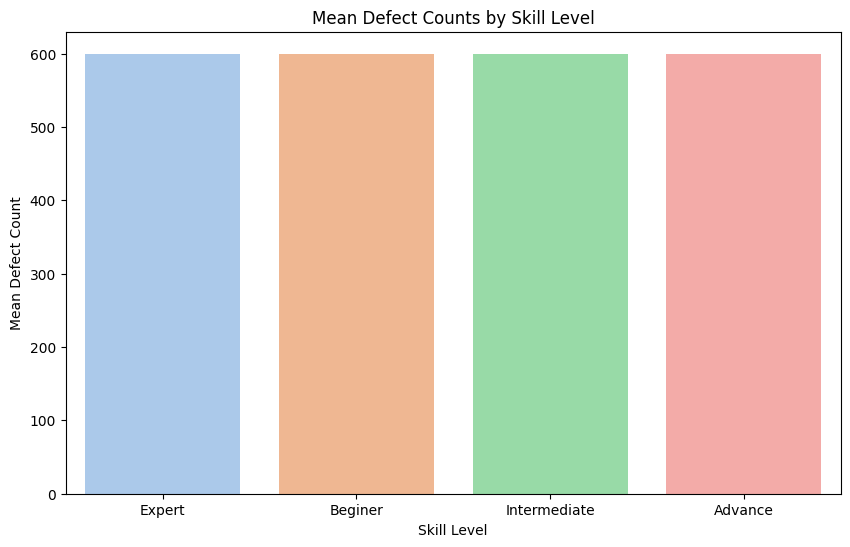

/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/801270255.py:260: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Gender', y='Production_Volume', ci=None, palette='pastel')
/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/801270255.py:260: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined_data, x='Gender', y='Production_Volume', ci=None, palette='pastel')


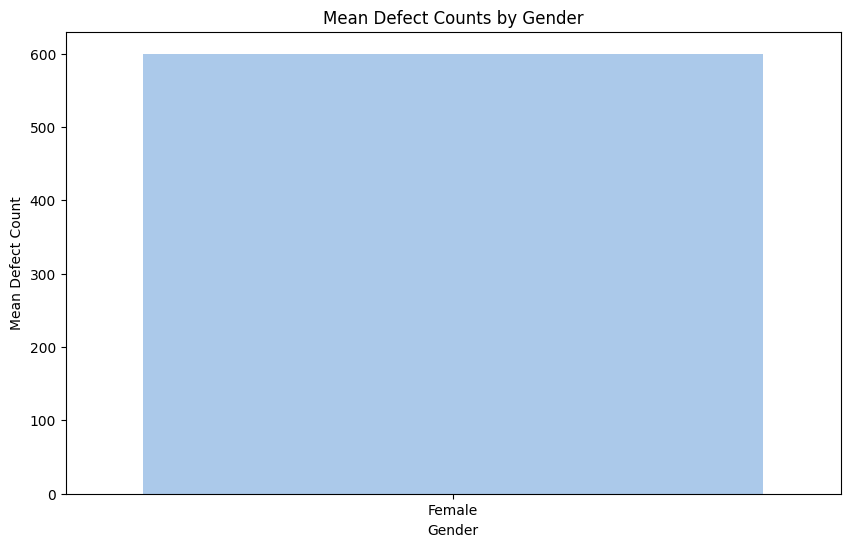

/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/801270255.py:268: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Run_Off', y='Age', palette='pastel')


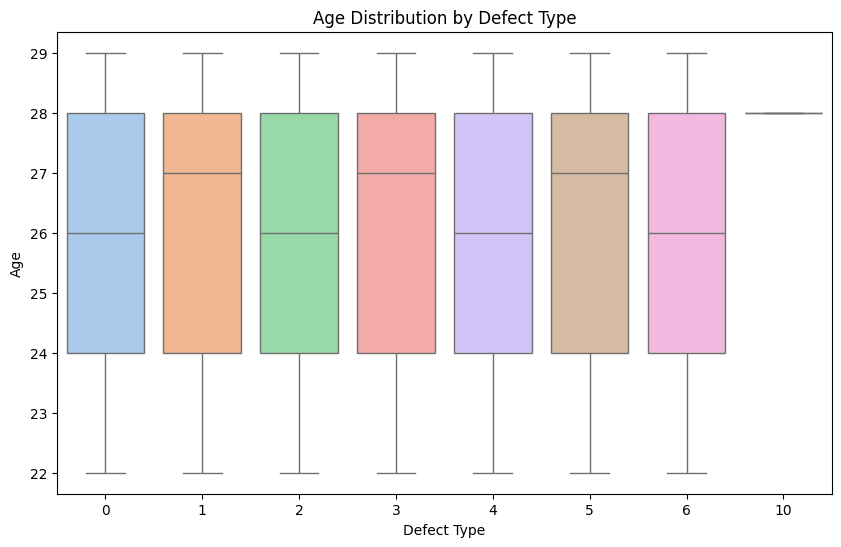

/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/801270255.py:276: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Run_Off', y='Production_Volume', palette='pastel')


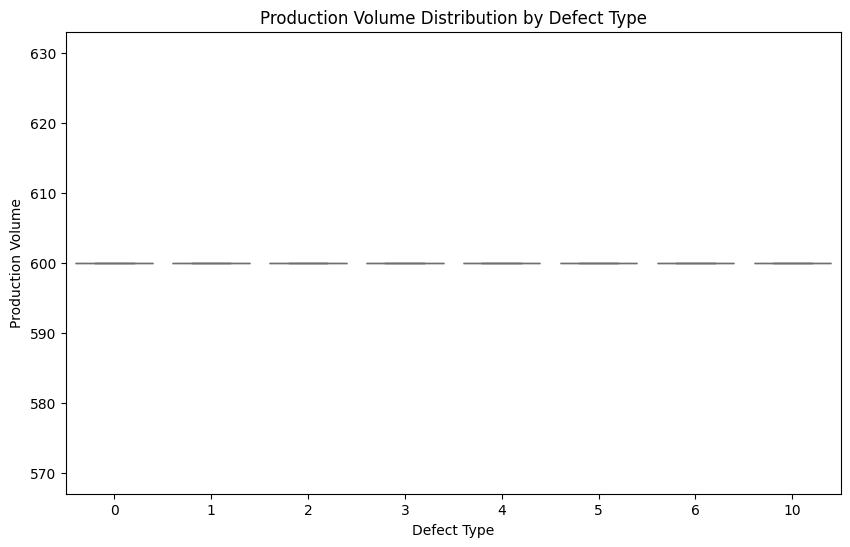

Metrics for Run_Off:
  - Accuracy: 0.8264984227129337
  - Precision: 0.8264984227129337
  - Recall: 1.0
  - F1 Score: 0.9050086355785838
----------------------------------------------------------------


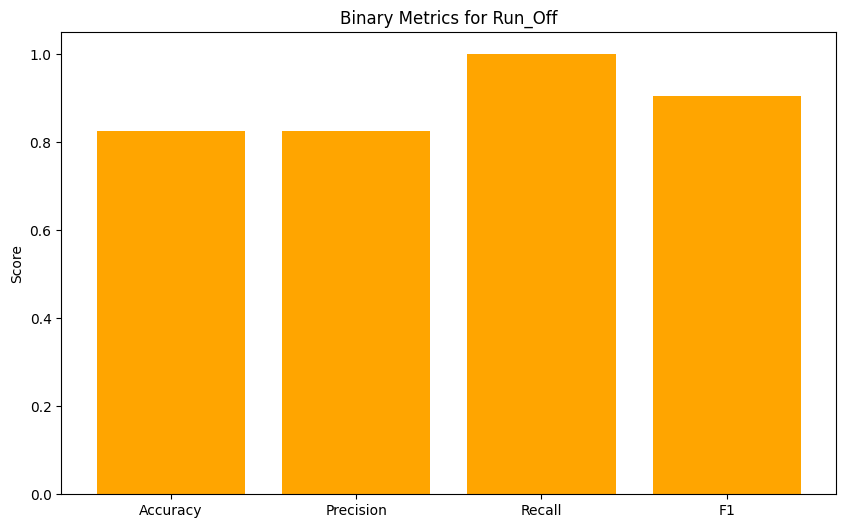

Metrics for Open_Seam:
  - Accuracy: 0.8517350157728707
  - Precision: 0.8517350157728707
  - Recall: 1.0
  - F1 Score: 0.919931856899489
----------------------------------------------------------------


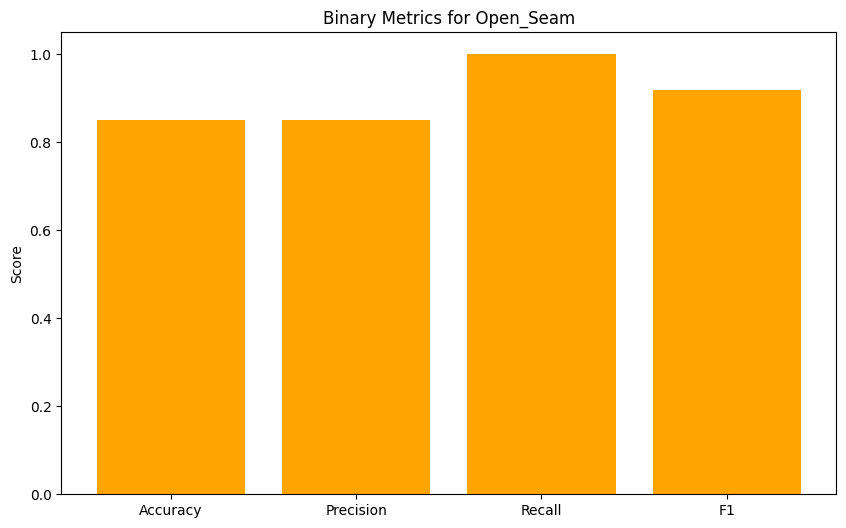

Metrics for SPI_Errors:
  - Accuracy: 0.8485804416403786
  - Precision: 0.8485804416403786
  - Recall: 1.0
  - F1 Score: 0.9180887372013652
----------------------------------------------------------------


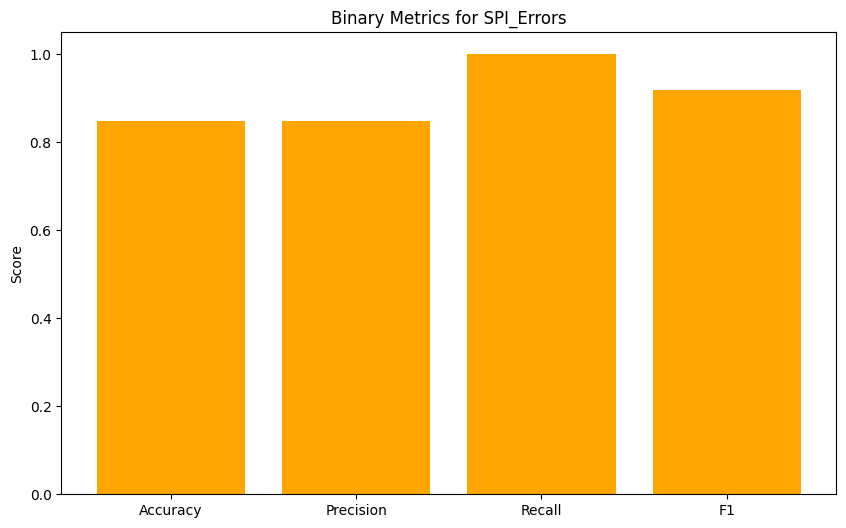

Metrics for High_Low:
  - Accuracy: 0.8264984227129337
  - Precision: 0.8264984227129337
  - Recall: 1.0
  - F1 Score: 0.9050086355785838
----------------------------------------------------------------


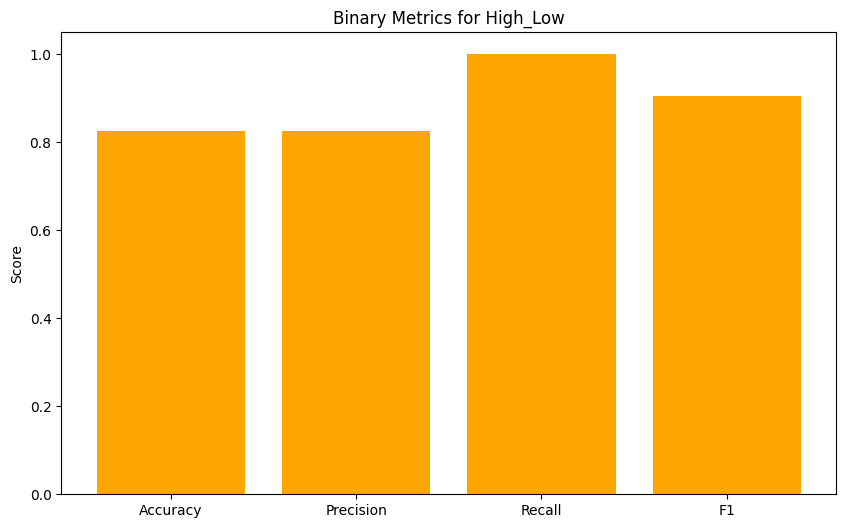

Overall Accuracy: 0.14353312302839116
Overall Precision: 0.02050473186119874
Overall Recall: 0.14285714285714285
Overall F1 Score: 0.03586206896551724


/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


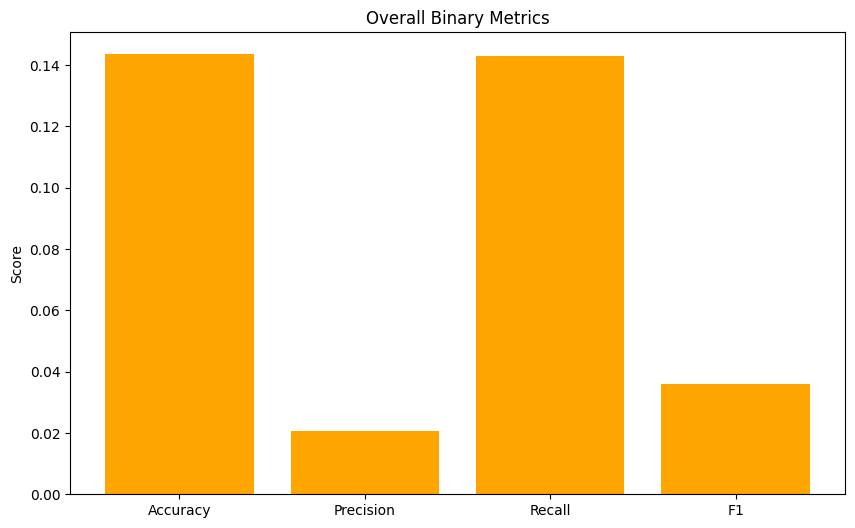

In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import randint, uniform
import joblib

# Ensure plots are shown within the notebook
%matplotlib inline

# Define a directory to save models
save_dir = '/Users/minu/Desktop/R24-066/Component 04/Backend/Save_model'
os.makedirs(save_dir, exist_ok=True)

# Read the data
demographic_data = pd.read_csv('/Users/minu/Desktop/R24-066/Component 04/Dataset/demographic_data_dataset.csv')
defect_data = pd.read_csv('/Users/minu/Desktop/R24-066/Component 04/Dataset/worker_defect_production_data.csv')

# Convert Date columns to datetime
demographic_data['Joining_Date'] = pd.to_datetime(demographic_data['Joining_Date'])
defect_data['Date'] = pd.to_datetime(defect_data['Date'])

# Combine datasets on Worker_ID
combined_data = pd.merge(defect_data, demographic_data, on='Worker_ID')

# Drop unnecessary columns
fields_to_drop = ['Name', 'Joining_Date']
combined_data.drop(columns=fields_to_drop, inplace=True)

# Rename defect columns
defect_columns_mapping = {
    'Run_Off_D1': 'Run_Off',
    'Open_Seam_D2': 'Open_Seam',
    'SPI_Errors_D3': 'SPI_Errors',
    'High_Low_D4': 'High_Low'
}
combined_data.rename(columns=defect_columns_mapping, inplace=True)

# Define categorical features for one-hot encoding
categorical_features = ['Gender', 'Skill_Level', 'Shift']
numerical_features = ['Age', 'Production_Volume']

# Time-Series Feature Engineering
combined_data['DayOfWeek'] = combined_data['Date'].dt.dayofweek
combined_data['WeekOfYear'] = combined_data['Date'].dt.isocalendar().week
combined_data['Month'] = combined_data['Date'].dt.month
combined_data['Quarter'] = combined_data['Date'].dt.quarter

numerical_features.extend(['DayOfWeek', 'WeekOfYear', 'Month', 'Quarter'])

# Ensure that all columns are present
missing_columns = [col for col in categorical_features + numerical_features if col not in combined_data.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing in the combined dataset: {missing_columns}")

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# Separate features and target variables
X = combined_data.drop(columns=['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low', 'defect_count', 'count', 'Worker_ID', 'Date'])
y = combined_data[['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and hyperparameter grids
models = {
    'RandomForest': {
        'model': MultiOutputRegressor(RandomForestRegressor(random_state=42)),
        'param_dist': {
            'regressor__estimator__n_estimators': randint(50, 200),
            'regressor__estimator__max_depth': randint(5, 20),
            'regressor__estimator__min_samples_split': randint(2, 10),
            'regressor__estimator__min_samples_leaf': randint(1, 10),
        }
    },
    'GradientBoosting': {
        'model': MultiOutputRegressor(GradientBoostingRegressor(random_state=42)),
        'param_dist': {
            'regressor__estimator__n_estimators': randint(50, 200),
            'regressor__estimator__learning_rate': uniform(0.01, 0.1),
            'regressor__estimator__max_depth': randint(3, 15),
            'regressor__estimator__min_samples_split': randint(2, 10),
            'regressor__estimator__min_samples_leaf': randint(1, 10),
        }
    },
    'SupportVector': {
        'model': MultiOutputRegressor(SVR()),
        'param_dist': {
            'regressor__estimator__C': uniform(0.1, 10),
            'regressor__estimator__epsilon': uniform(0.01, 0.1),
            'regressor__estimator__kernel': ['linear', 'poly', 'rbf'],
        }
    },
    'LinearRegression': {
        'model': MultiOutputRegressor(LinearRegression()),
        'param_dist': {}  
    },
    'RidgeRegression': {
        'model': MultiOutputRegressor(Ridge(random_state=42)),
        'param_dist': {
            'regressor__estimator__alpha': uniform(0.1, 10)
        }
    },
    'LassoRegression': {
        'model': MultiOutputRegressor(Lasso(random_state=42)),
        'param_dist': {
            'regressor__estimator__alpha': uniform(0.1, 10)
        }
    }
}

# Initialize dictionary to store results
results = {}

# Perform RandomizedSearchCV for each model
for model_name, model_info in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model_info['model'])
    ])
    
    # If there are hyperparameters to tune
    if model_info['param_dist']:
        random_search = RandomizedSearchCV(pipeline, param_distributions=model_info['param_dist'], n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
        random_search.fit(X_train, y_train)
        
        # Store the best score and model
        results[model_name] = {
            'best_score': -random_search.best_score_,
            'best_params': random_search.best_params_,
            'best_model': random_search.best_estimator_
        }
    else:  # For models without hyperparameters to tune (like Linear Regression)
        pipeline.fit(X_train, y_train)
        best_score = -cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
        
        results[model_name] = {
            'best_score': best_score,
            'best_params': "N/A",
            'best_model': pipeline
        }
    
    print(f"Model: {model_name}")
    print(f"  Best Score (MSE): {results[model_name]['best_score']}")
    print(f"  Best Parameters: {results[model_name]['best_params']}")
    print('----------------------------------------------------------------')

# Select the best model based on the best score
best_model_name = min(results, key=lambda k: results[k]['best_score'])
best_model = results[best_model_name]['best_model']

print(f"Best model: {best_model_name} with Mean CV MSE = {results[best_model_name]['best_score']}")
print()

# Save the best model
model_path = os.path.join(save_dir, f'{best_model_name}_best_model.pkl')
joblib.dump(best_model, model_path)
print(f"Model saved to {model_path}")

# Predict on the test set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model and print metrics for each defect type
mse_values = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2_values = r2_score(y_test, y_pred, multioutput='raw_values')
mae_values = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
defect_types = ['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']

# Display evaluation metrics as plots
for defect_type, mse, r2, mae in zip(defect_types, mse_values, r2_values, mae_values):
    print(f"Metrics for {defect_type}:")
    print(f"  - Mean Squared Error: {mse}")
    print(f"  - R² Score: {r2}")
    print(f"  - Mean Absolute Error: {mae}")
    print('----------------------------------------------------------------')
    # Plotting metrics for each defect type
    plt.figure(figsize=(10, 6))
    plt.bar(['MSE', 'R2', 'MAE'], [mse, r2, mae], color='lightblue')
    plt.title(f'Metrics for {defect_type}')
    plt.ylabel('Score')
    plt.show()

# Overall evaluation metrics
overall_mse = mean_squared_error(y_test, y_pred)
overall_r2 = r2_score(y_test, y_pred)
overall_mae = mean_absolute_error(y_test, y_pred)

print(f"Overall Mean Squared Error: {overall_mse}")
print(f"Overall R² Score: {overall_r2}")
print(f"Overall Mean Absolute Error: {overall_mae}")

# Residual Analysis
residuals = y_test.values - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test.values.flatten(), residuals.flatten())
plt.hlines(y=0, xmin=y_test.values.flatten().min(), xmax=y_test.values.flatten().max(), colors='red')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals vs True Values')
plt.show()

# Analyze the effect of Age and Skill Level on each defect type
def analyze_demographics(data, defect_types):
    for defect_type in defect_types:
        subset = data[data[defect_type] > 0]  # Filter rows where the defect type count is greater than 0
        
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
        
        # Age Distribution
        sns.histplot(subset['Age'], ax=axes[0], kde=True, color='lightblue')
        axes[0].set_title(f'Age Distribution for {defect_type}')
        axes[0].set_xlabel('Age')
        axes[0].set_ylabel('Frequency')
        
        # Skill Level Distribution
        sns.countplot(x=subset['Skill_Level'], ax=axes[1], palette='pastel')
        axes[1].set_title(f'Skill Level Distribution for {defect_type}')
        axes[1].set_xlabel('Skill Level')
        axes[1].set_ylabel('Count')
        
        plt.tight_layout()
        plt.show()

# Analyze the effect of Age and Skill Level on each defect type
analyze_demographics(combined_data, defect_types)

# Heatmap of Defect Counts across Skill Levels and Defect Types
pivot_table = combined_data.pivot_table(index='Skill_Level', columns='Run_Off', values='Production_Volume', aggfunc='sum')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='Pastel1')
plt.title('Heatmap of Defect Counts across Skill Levels and Defect Types')
plt.show()

# Bar plot for mean defect counts by Skill Level
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_data, x='Skill_Level', y='Production_Volume', ci=None, palette='pastel')
plt.title('Mean Defect Counts by Skill Level')
plt.xlabel('Skill Level')
plt.ylabel('Mean Defect Count')
plt.show()

# Bar plot for mean defect counts by Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_data, x='Gender', y='Production_Volume', ci=None, palette='pastel')
plt.title('Mean Defect Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Defect Count')
plt.show()

# Box plot for Age distribution by defect type
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='Run_Off', y='Age', palette='pastel')
plt.title('Age Distribution by Defect Type')
plt.xlabel('Defect Type')
plt.ylabel('Age')
plt.show()

# Box plot for Production Volume distribution by defect type
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='Run_Off', y='Production_Volume', palette='pastel')
plt.title('Production Volume Distribution by Defect Type')
plt.xlabel('Defect Type')
plt.ylabel('Production Volume')
plt.show()

# Function to convert regression outputs to binary (e.g., defect present or not)
def to_binary_predictions(y_true, y_pred, threshold=0.5):
    y_true_binary = (y_true > threshold).astype(int)
    y_pred_binary = (y_pred > threshold).astype(int)
    return y_true_binary, y_pred_binary

# Calculate binary metrics for each defect type
for defect_type in defect_types:
    y_true = y_test[defect_type]
    y_pred_single = y_pred[:, defect_types.index(defect_type)]

    # Convert to binary predictions
    y_true_binary, y_pred_binary = to_binary_predictions(y_true, y_pred_single)

    accuracy = accuracy_score(y_true_binary, y_pred_binary)
    precision = precision_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)

    print(f"Metrics for {defect_type}:")
    print(f"  - Accuracy: {accuracy}")
    print(f"  - Precision: {precision}")
    print(f"  - Recall: {recall}")
    print(f"  - F1 Score: {f1}")
    print('----------------------------------------------------------------')

    # Display the binary metrics plot
    plt.figure(figsize=(10, 6))
    plt.bar(['Accuracy', 'Precision', 'Recall', 'F1'], [accuracy, precision, recall, f1], color='orange')
    plt.title(f'Binary Metrics for {defect_type}')
    plt.ylabel('Score')
    plt.show()

# Overall evaluation metrics (assuming averaging across defect types)
overall_accuracy = accuracy_score(y_test.values.flatten(), (y_pred.flatten() > 0.5).astype(int))
overall_precision = precision_score(y_test.values.flatten(), (y_pred.flatten() > 0.5).astype(int), average='macro')
overall_recall = recall_score(y_test.values.flatten(), (y_pred.flatten() > 0.5).astype(int), average='macro')
overall_f1 = f1_score(y_test.values.flatten(), (y_pred.flatten() > 0.5).astype(int), average='macro')

print(f"Overall Accuracy: {overall_accuracy}")
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")
print(f"Overall F1 Score: {overall_f1}")

# Display overall binary metrics plot
plt.figure(figsize=(10, 6))
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1'], [overall_accuracy, overall_precision, overall_recall, overall_f1], color='orange')
plt.title('Overall Binary Metrics')
plt.ylabel('Score')
plt.show()

# Check feature importances for the best model if it's a tree-based model
if hasattr(best_model.named_steps['regressor'], 'estimators_'):
    for i, defect_type in enumerate(defect_types):
        if hasattr(best_model.named_steps['regressor'].estimators_[i], 'feature_importances_'):
            importances = best_model.named_steps['regressor'].estimators_[i].feature_importances_
            indices = np.argsort(importances)[::-1]
            
            # Plot the feature importances
            plt.figure(figsize=(10, 6))
            plt.title(f"Feature Importances for {defect_type} in Best Model ({best_model_name})")
            plt.bar(range(len(importances)), importances[indices], align='center')
            plt.xticks(range(len(importances)), [numerical_features[j] for j in indices], rotation=90)
            plt.xlim([-1, len(importances)])
            plt.show()

## Model Comparison

/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/2653740901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mse_all, palette='Blues_d')  # Use a valid seaborn palette


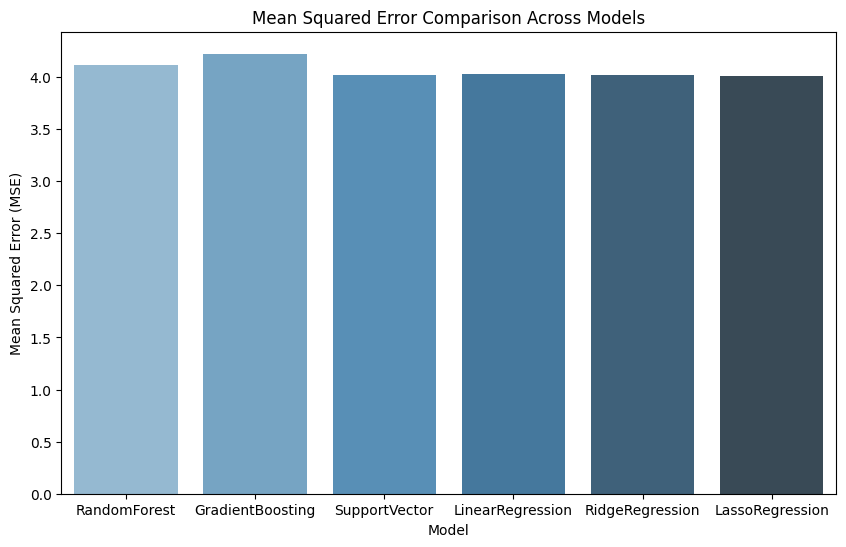

In [27]:

# Plotting MSE for each model
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mse_all, palette='Blues_d')  # Use a valid seaborn palette
plt.title('Mean Squared Error Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
# plt.xticks(rotation=45)
plt.show()

/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/3247650093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mae_scores, palette="Reds_d")


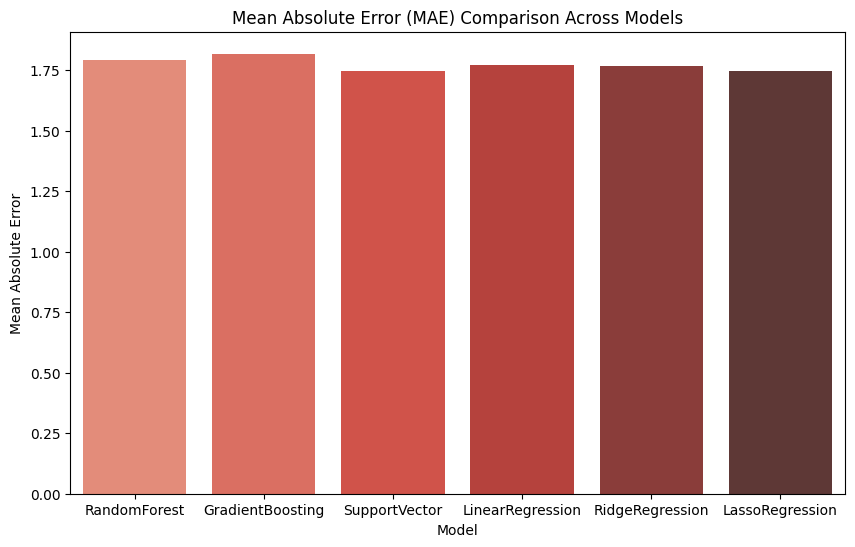

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mae_scores, palette="Reds_d")
plt.title('Mean Absolute Error (MAE) Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.show()

/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_34312/2795376037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette="Greens_d")


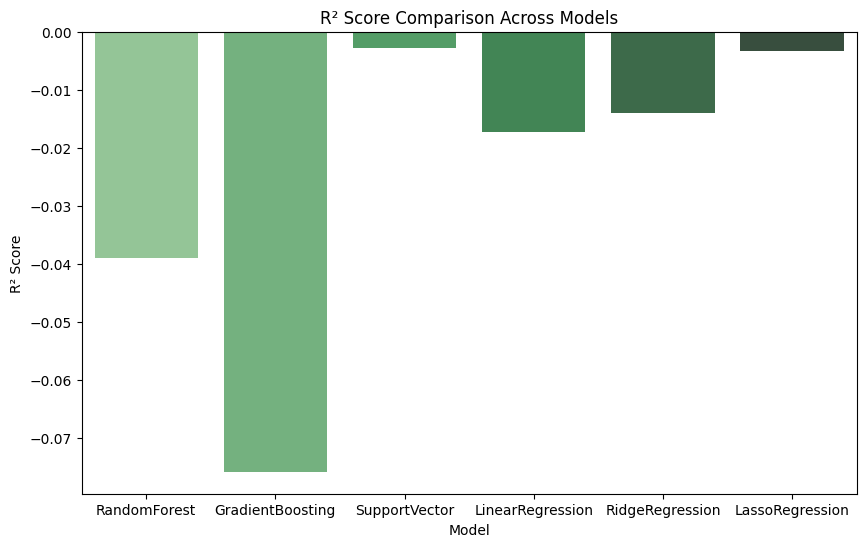

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=r2_scores, palette="Greens_d")
plt.title('R² Score Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.show()

In [40]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming r2_scores is a list of R² scores obtained from your models
# # For example:
# # r2_scores = [-0.03, -0.05, -0.02, -0.01, -0.04, -0.02]

# # Convert negative R² scores to positive by taking the absolute value
# positive_r2_scores = [abs(score) for score in r2_scores]

# # Model names corresponding to the R² scores
# model_names = ['RandomForest', 'GradientBoosting', 'SupportVector', 'LinearRegression', 'RidgeRegression', 'LassoRegression']

# # Plotting the R² Score Comparison Across Models
# plt.figure(figsize=(10, 6))
# sns.barplot(x=model_names, y=positive_r2_scores, palette="Greens_d")
# plt.title('Positive R² Score Comparison Across Models')
# plt.xlabel('Model')
# plt.ylabel('R² Score')
# plt.show()

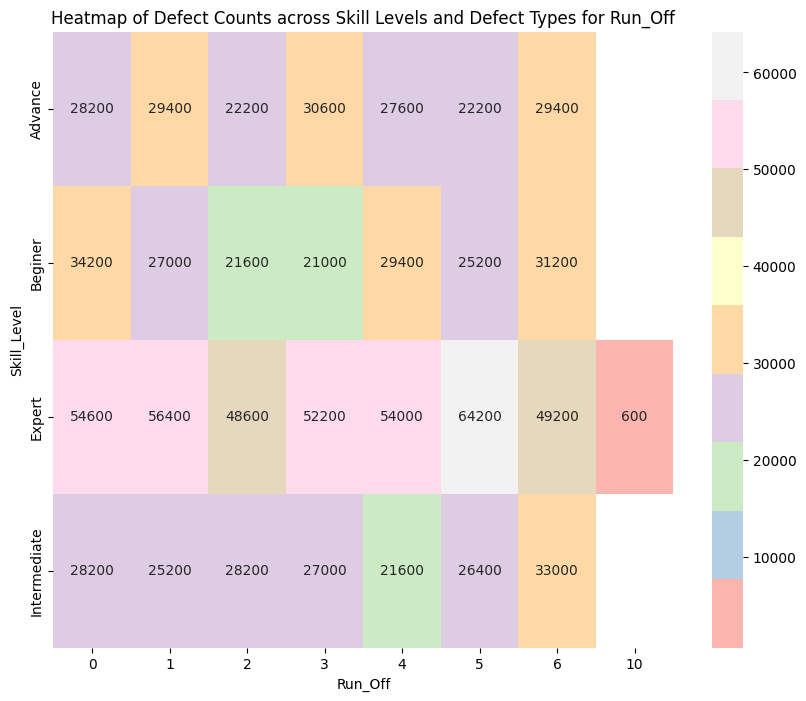

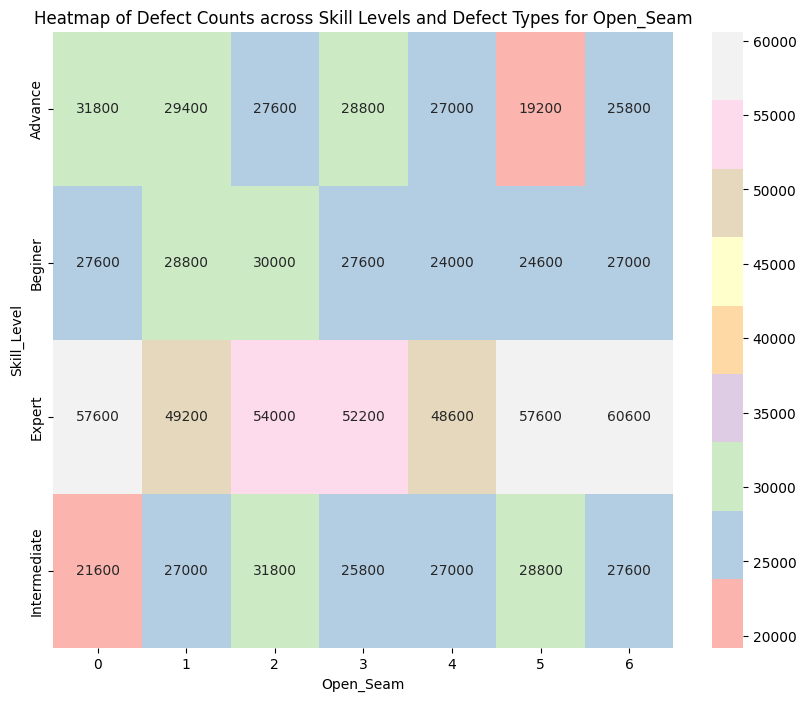

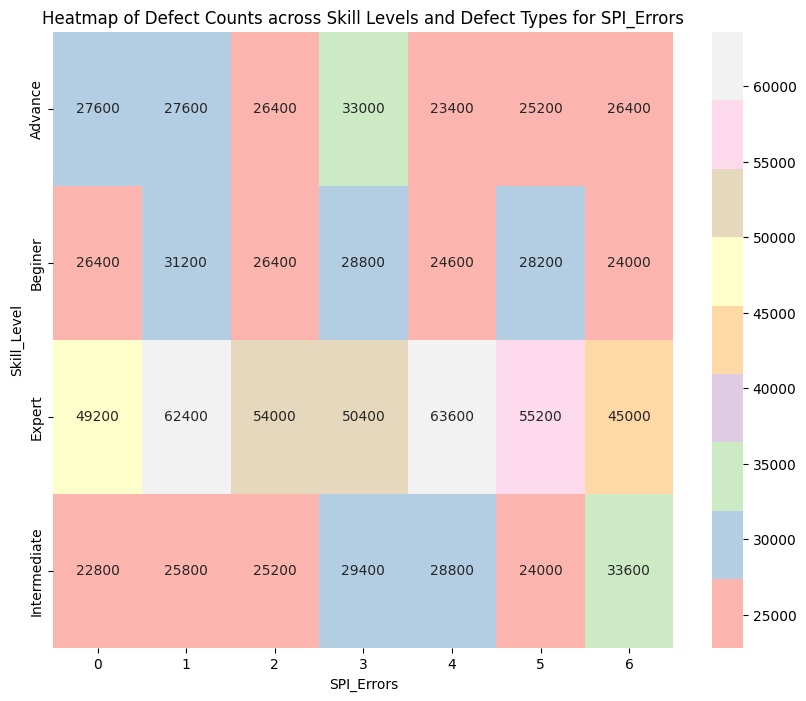

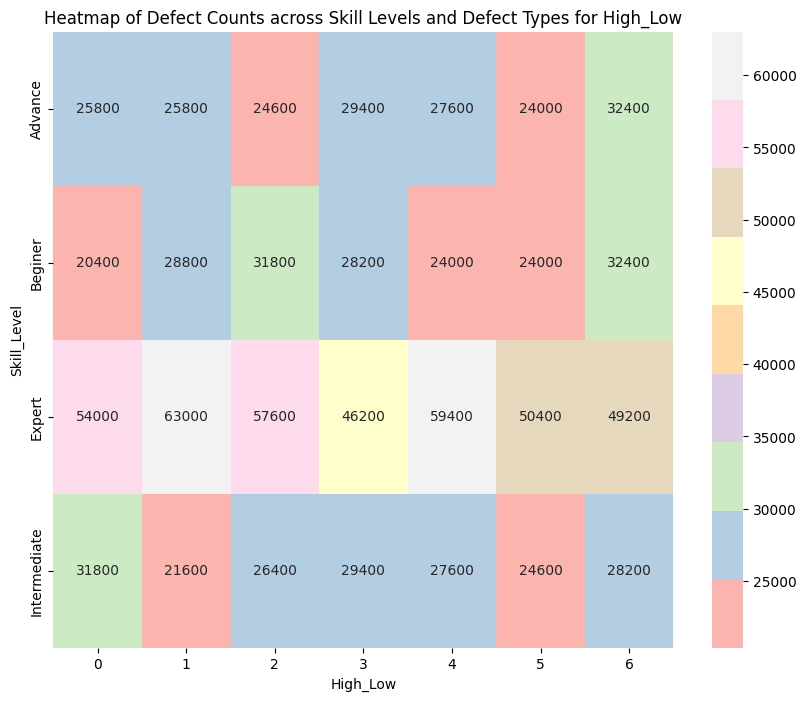

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of defect types
defect_types = ['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']

# Generate heatmaps for each defect type
for defect_type in defect_types:
    pivot_table = combined_data.pivot_table(index='Skill_Level', columns=defect_type, values='Production_Volume', aggfunc='sum')
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Pastel1')
    plt.title(f'Heatmap of Defect Counts across Skill Levels and Defect Types for {defect_type}')
    plt.show()